In [1]:
#proprecessing
import pandas as pd
from pandas import read_csv,set_option
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#Neural Network
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizer_v2.adam import Adam
#helper function to update the weights in the Neural network
import numpy as npz
import pylab as plt

In [2]:
import os

In [3]:
os.getcwd()

'/Users/ruxiaoqian/Project 7/dqn'

In [4]:
"""
读取和预处理
"""
dataset = read_csv(r"sh600900.csv",index_col=0)
#fillna
dataset.fillna(method = 'ffill')
#保留列名
column = dataset.columns
#原dataset不动
data = dataset
#归一化后是array转成DataFrame并换为原列名
minmax = preprocessing.MinMaxScaler()
data = minmax.fit_transform(data)
data = pd.DataFrame(data)
data.columns = column
#y是收盘价,x是其他因子
y = pd.DataFrame(data['close'])
x = data.drop(columns = 'close')
#掐头去尾，前一天因子对应后一天价格
x = x.iloc[:-1,:]
y = y.iloc[1:,:]
#分割训练测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 7, shuffle = False)
yo_train,yo_test = train_test_split(dataset['close'],test_size = 0.2,random_state = 7, shuffle = False)

In [5]:
"""
建立神经网络结构空壳
"""
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizer_v2.adam import Adam
dim = x_train.shape[1]
action_options = 3
model = Sequential()
#Input Layer
model.add(Dense(units=64, input_dim=dim, activation="relu"))
#Hidden Layers
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=8, activation="relu"))
#Output Layer 
model.add(Dense(action_options, activation="linear"))
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

2022-03-31 19:34:36.793291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-31 19:34:36.793654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [6]:
#fit所需辅助函数
import numpy as np
import pylab as plt
def getState(data,t):
    state = pd.DataFrame(data.iloc[t,:]).T
    return state
def plot_behavior(data_input, states_buy, states_sell, profit):
    fig = plt.figure(figsize = (15,5))
    plt.plot(data_input, color='b', lw=2.)
    plt.plot(data_input, '^', markersize=10, color='m', label = 'Buying signal', markevery = states_buy)
    plt.plot(data_input, 'v', markersize=10, color='g', label = 'Selling signal', markevery = states_sell)
    plt.title('Total gains: %f'%(profit))
    plt.legend()
    #plt.savefig('output/'+name+'.png')
    plt.show()
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

In [8]:
print(y)

        close
1    0.161088
2    0.185146
3    0.197699
4    0.212343
5    0.229079
..        ...
962  0.805439
963  0.854603
964  0.941423
965  0.952929
966  1.000000

[966 rows x 1 columns]


2022-03-31 19:34:52.815460: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-31 19:34:52.861002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-31 19:34:54.108219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 5ms/step - loss: 8.0371e-07


1/1 [==============================] - 0s 5ms/step - loss: 7.2429e-06


1/1 [==============================] - 0s 5ms/step - loss: 1.0602e-06


1/1 [==============================] - 0s 5ms/step - loss: 3.5264e-07


1/1 [==============================] - 0s 5ms/step - loss: 2.7771e-10


1/1 [==============================] - 0s 5ms/step - loss: 7.1262e-08


1/1 [==============================] - 0s 5ms/step - loss: 3.8505e-08


1/1 [==============================] - 0s 5ms/step - loss: 5.2100e-09


1/1 [==============================] - 0s 5ms/step - loss: 6.9273e-09


1/1 [==============================] - 0s 5ms/step - loss: 6.3947e-08


1/1 [==============================] - 0s 5ms/step - loss: 8.1761e-09


1/1 [==============================] - 0s 5ms/step - loss: 1.2311e-11


1/1 [==============================] - 0s 5ms/step - loss: 1.0193e-08


1/1 [==============================] - 0s 5ms/step - loss: 6.6916e-08


1/1 [==============================] - 0s 5ms/step - loss: 2.6938e-08


1/1 [==============================] - 0s 5ms/step - loss: 3.3413e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.0377e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.1871e-07


1/1 [==============================] - 0s 9ms/step - loss: 7.9330e-07


1/1 [==============================] - 0s 5ms/step - loss: 6.0156e-07


1/1 [==============================] - 0s 5ms/step - loss: 3.9497e-08


1/1 [==============================] - 0s 5ms/step - loss: 7.0021e-08


1/1 [==============================] - 0s 5ms/step - loss: 5.0944e-09


1/1 [==============================] - 0s 5ms/step - loss: 6.0541e-08


1/1 [==============================] - 0s 5ms/step - loss: 1.1106e-08


1/1 [==============================] - 0s 5ms/step - loss: 4.0945e-10


1/1 [==============================] - 0s 5ms/step - loss: 1.2389e-09


1/1 [==============================] - 0s 5ms/step - loss: 6.5842e-09


1/1 [==============================] - 0s 5ms/step - loss: 1.1807e-08


1/1 [==============================] - 0s 5ms/step - loss: 3.5839e-10


1/1 [==============================] - 0s 5ms/step - loss: 1.2299e-10


1/1 [==============================] - 0s 5ms/step - loss: 4.5129e-09


1/1 [==============================] - 0s 5ms/step - loss: 1.2949e-09


1/1 [==============================] - 0s 5ms/step - loss: 1.5128e-08


1/1 [==============================] - 0s 5ms/step - loss: 3.7154e-08


1/1 [==============================] - 0s 5ms/step - loss: 4.0887e-08


1/1 [==============================] - 0s 5ms/step - loss: 2.1340e-08


1/1 [==============================] - 0s 5ms/step - loss: 1.1448e-07


1/1 [==============================] - 0s 5ms/step - loss: 5.5588e-08


1/1 [==============================] - 0s 5ms/step - loss: 2.0170e-07


1/1 [==============================] - 0s 5ms/step - loss: 7.3864e-10


1/1 [==============================] - 0s 5ms/step - loss: 7.1764e-10


1/1 [==============================] - 0s 5ms/step - loss: 2.4375e-11


1/1 [==============================] - 0s 5ms/step - loss: 8.7155e-13


1/1 [==============================] - 0s 5ms/step - loss: 7.3531e-14


1/1 [==============================] - 0s 5ms/step - loss: 2.8985e-15


1/1 [==============================] - 0s 5ms/step - loss: 6.6127e-18


1/1 [==============================] - 0s 5ms/step - loss: 1.7863e-21


1/1 [==============================] - 0s 5ms/step - loss: 5.0065e-26


1/1 [==============================] - 0s 5ms/step - loss: 1.0745e-28


1/1 [==============================] - 0s 5ms/step - loss: 3.2180e-05


1/1 [==============================] - 0s 5ms/step - loss: 4.4544e-06


1/1 [==============================] - 0s 5ms/step - loss: 1.4539e-06


1/1 [==============================] - 0s 5ms/step - loss: 4.9431e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.5226e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.0086e-05


1/1 [==============================] - 0s 5ms/step - loss: 3.2221e-05


1/1 [==============================] - 0s 5ms/step - loss: 6.0507e-05


1/1 [==============================] - 0s 5ms/step - loss: 7.9714e-05


1/1 [==============================] - 0s 5ms/step - loss: 6.4944e-05


1/1 [==============================] - 0s 5ms/step - loss: 5.7697e-08


1/1 [==============================] - 0s 5ms/step - loss: 0.0024


1/1 [==============================] - 0s 5ms/step - loss: 3.0691e-04


1/1 [==============================] - 0s 5ms/step - loss: 1.4875e-04


1/1 [==============================] - 0s 5ms/step - loss: 3.4617e-04


1/1 [==============================] - 0s 5ms/step - loss: 2.3946e-07


1/1 [==============================] - 0s 5ms/step - loss: 2.3587e-04


1/1 [==============================] - 0s 5ms/step - loss: 8.9345e-04


1/1 [==============================] - 0s 5ms/step - loss: 6.8888e-04


1/1 [==============================] - 0s 5ms/step - loss: 1.7498e-04


1/1 [==============================] - 0s 5ms/step - loss: 4.0827e-04


1/1 [==============================] - 0s 5ms/step - loss: 9.1956e-05


1/1 [==============================] - 0s 5ms/step - loss: 0.0016


1/1 [==============================] - 0s 5ms/step - loss: 0.0013


1/1 [==============================] - 0s 5ms/step - loss: 0.0011


1/1 [==============================] - 0s 5ms/step - loss: 9.8018e-04


1/1 [==============================] - 0s 5ms/step - loss: 0.0013


1/1 [==============================] - 0s 5ms/step - loss: 0.0014


1/1 [==============================] - 0s 5ms/step - loss: 0.0011


1/1 [==============================] - 0s 5ms/step - loss: 4.5094e-05


1/1 [==============================] - 0s 5ms/step - loss: 8.6123e-04


1/1 [==============================] - 0s 5ms/step - loss: 3.7481e-04


1/1 [==============================] - 0s 5ms/step - loss: 0.0021


1/1 [==============================] - 0s 5ms/step - loss: 0.0018


1/1 [==============================] - 0s 5ms/step - loss: 0.0015


1/1 [==============================] - 0s 5ms/step - loss: 0.0013


1/1 [==============================] - 0s 5ms/step - loss: 0.0011


1/1 [==============================] - 0s 5ms/step - loss: 9.1096e-04


1/1 [==============================] - 0s 5ms/step - loss: 7.6989e-04


1/1 [==============================] - 0s 5ms/step - loss: 6.4731e-04


1/1 [==============================] - 0s 5ms/step - loss: 5.4105e-04


1/1 [==============================] - 0s 5ms/step - loss: 4.4927e-04


1/1 [==============================] - 0s 5ms/step - loss: 3.7036e-04


1/1 [==============================] - 0s 5ms/step - loss: 3.0286e-04


1/1 [==============================] - 0s 5ms/step - loss: 2.4550e-04


1/1 [==============================] - 0s 5ms/step - loss: 1.9710e-04


1/1 [==============================] - 0s 5ms/step - loss: 1.5660e-04


1/1 [==============================] - 0s 5ms/step - loss: 1.2664e-04


1/1 [==============================] - 0s 5ms/step - loss: 1.0198e-04


1/1 [==============================] - 0s 5ms/step - loss: 8.1035e-05


1/1 [==============================] - 0s 5ms/step - loss: 6.3479e-05


1/1 [==============================] - 0s 5ms/step - loss: 4.9046e-05


1/1 [==============================] - 0s 5ms/step - loss: 3.7333e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.7986e-05


1/1 [==============================] - 0s 5ms/step - loss: 4.6559e-06


1/1 [==============================] - 0s 5ms/step - loss: 2.6808e-06


1/1 [==============================] - 0s 5ms/step - loss: 1.2179e-05


1/1 [==============================] - 0s 5ms/step - loss: 9.7028e-06


1/1 [==============================] - 0s 5ms/step - loss: 7.5526e-06


1/1 [==============================] - 0s 5ms/step - loss: 6.3743e-06


1/1 [==============================] - 0s 5ms/step - loss: 5.1323e-06


1/1 [==============================] - 0s 5ms/step - loss: 5.7380e-06


1/1 [==============================] - 0s 5ms/step - loss: 5.4157e-06


1/1 [==============================] - 0s 5ms/step - loss: 7.9524e-09


1/1 [==============================] - 0s 5ms/step - loss: 5.0940e-06


1/1 [==============================] - 0s 5ms/step - loss: 4.7054e-06


1/1 [==============================] - 0s 5ms/step - loss: 2.3901e-06


1/1 [==============================] - 0s 5ms/step - loss: 3.8645e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.5814e-06


1/1 [==============================] - 0s 5ms/step - loss: 5.2780e-07


1/1 [==============================] - 0s 5ms/step - loss: 5.6623e-07


1/1 [==============================] - 0s 5ms/step - loss: 3.3457e-06


1/1 [==============================] - 0s 5ms/step - loss: 6.3106e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.5909e-07


1/1 [==============================] - 0s 5ms/step - loss: 5.9136e-07


1/1 [==============================] - 0s 5ms/step - loss: 8.7473e-07


1/1 [==============================] - 0s 5ms/step - loss: 6.3117e-07


1/1 [==============================] - 0s 5ms/step - loss: 9.9044e-07


1/1 [==============================] - 0s 5ms/step - loss: 9.0657e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.3379e-05


1/1 [==============================] - 0s 5ms/step - loss: 8.2583e-06


1/1 [==============================] - 0s 5ms/step - loss: 7.5007e-04


1/1 [==============================] - 0s 5ms/step - loss: 1.2829e-07


1/1 [==============================] - 0s 5ms/step - loss: 3.5949e-06


1/1 [==============================] - 0s 5ms/step - loss: 8.9951e-07


1/1 [==============================] - 0s 5ms/step - loss: 2.1177e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.3206e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.4140e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.2580e-05


1/1 [==============================] - 0s 5ms/step - loss: 1.1703e-05


1/1 [==============================] - 0s 5ms/step - loss: 1.4665e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.3990e-06


1/1 [==============================] - 0s 5ms/step - loss: 1.8895e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.7923e-05


1/1 [==============================] - 0s 5ms/step - loss: 3.5245e-05


1/1 [==============================] - 0s 5ms/step - loss: 4.1031e-05


1/1 [==============================] - 0s 5ms/step - loss: 4.5475e-05


1/1 [==============================] - 0s 5ms/step - loss: 4.8563e-05


1/1 [==============================] - 0s 5ms/step - loss: 0.0022


1/1 [==============================] - 0s 5ms/step - loss: 3.1144e-05


1/1 [==============================] - 0s 5ms/step - loss: 1.6239e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.5310e-05


1/1 [==============================] - 0s 5ms/step - loss: 1.7660e-05


1/1 [==============================] - 0s 5ms/step - loss: 1.2346e-05


1/1 [==============================] - 0s 5ms/step - loss: 8.6887e-06


1/1 [==============================] - 0s 6ms/step - loss: 6.1786e-06


1/1 [==============================] - 0s 5ms/step - loss: 2.7597e-04


1/1 [==============================] - 0s 5ms/step - loss: 3.4004e-06


1/1 [==============================] - 0s 5ms/step - loss: 3.2763e-06


1/1 [==============================] - 0s 5ms/step - loss: 1.3793e-06


1/1 [==============================] - 0s 5ms/step - loss: 1.3241e-06


1/1 [==============================] - 0s 5ms/step - loss: 8.6214e-07


1/1 [==============================] - 0s 5ms/step - loss: 6.0001e-07


1/1 [==============================] - 0s 5ms/step - loss: 4.4765e-07


1/1 [==============================] - 0s 5ms/step - loss: 3.5551e-07


1/1 [==============================] - 0s 5ms/step - loss: 2.8885e-07


1/1 [==============================] - 0s 5ms/step - loss: 2.1745e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.5854e-05


1/1 [==============================] - 0s 5ms/step - loss: 2.7585e-07


1/1 [==============================] - 0s 5ms/step - loss: 7.4605e-07


1/1 [==============================] - 0s 7ms/step - loss: 7.8246e-07


1/1 [==============================] - 0s 7ms/step - loss: 8.0497e-07


1/1 [==============================] - 0s 5ms/step - loss: 7.8946e-07


1/1 [==============================] - 0s 5ms/step - loss: 7.6869e-07


1/1 [==============================] - 0s 5ms/step - loss: 7.1492e-07


1/1 [==============================] - 0s 6ms/step - loss: 7.8292e-07


1/1 [==============================] - 0s 5ms/step - loss: 9.6753e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.0077e-07


1/1 [==============================] - 0s 5ms/step - loss: 6.8915e-07


1/1 [==============================] - 0s 5ms/step - loss: 8.9048e-07


1/1 [==============================] - 0s 5ms/step - loss: 7.1469e-07


1/1 [==============================] - 0s 5ms/step - loss: 6.2078e-07


1/1 [==============================] - 0s 5ms/step - loss: 2.4949e-07


1/1 [==============================] - 0s 5ms/step - loss: 5.6514e-07


1/1 [==============================] - 0s 5ms/step - loss: 5.5937e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.1978e-06


1/1 [==============================] - 0s 5ms/step - loss: 9.0477e-07


1/1 [==============================] - 0s 5ms/step - loss: 5.6676e-09


1/1 [==============================] - 0s 5ms/step - loss: 1.4486e-06


1/1 [==============================] - 0s 5ms/step - loss: 4.3451e-07


1/1 [==============================] - 0s 5ms/step - loss: 4.2930e-07


1/1 [==============================] - 0s 5ms/step - loss: 3.9826e-07


1/1 [==============================] - 0s 5ms/step - loss: 3.7777e-07


1/1 [==============================] - 0s 5ms/step - loss: 1.5388e-08


1/1 [==============================] - 0s 5ms/step - loss: 1.0542e-08


1/1 [==============================] - 0s 5ms/step - loss: 1.3916e-08
-------------------------------
Total Profit: $7.07
-------------------------------


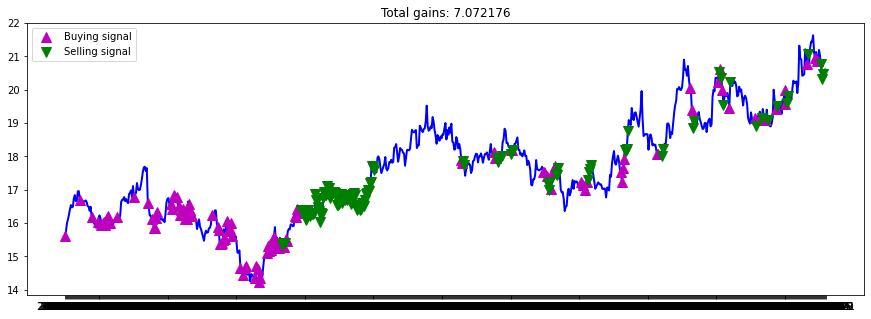

In [9]:
"""
自定义fit过程
"""
#fit 神经网络
from collections import deque
gamma = 0.95

total_profit = 0
batch_size = 32  ##
trainx = x_train

trainy = y_train
inventory = []
states_sell = []
states_buy = []
mini_batch = []  ##
memory = deque(maxlen=100)
for t in range(len(trainx)-1):
    #创建交易过程得到更新权重所需的收益，即Q(reward)
    state = getState(trainx,t)
    nextstate = getState(trainx,t+1)
    reward = 0
    action = np.argmax(model.predict(state))
    if action==1:
        inventory.append(trainy.iloc[t,:])
        states_buy.append(t)
    elif action ==2 and len(inventory)>0:
        bought_price = inventory.pop(0)
        reward = max(pd.DataFrame(trainy.iloc[t]-bought_price).values,0)
        total_profit += trainy.iloc[t]-bought_price
        states_sell.append(t)
    #用exprrience replay来更新权重
    #replay Buffer（fit）
    done = True if t==len(trainx) else False
    memory.append((state,action,reward,nextstate,done))
    if len(memory)>batch_size:
        mini_batch = []
        for i in range(len(memory)-batch_size+1,len(memory)):
            mini_batch.append(memory[i])
        
        for state,action,reward,next_state,done in mini_batch:
            target = reward #Q at time t
            #if haven't done, update the q at time t
            if not done:
                target = reward + gamma*np.amax(model.predict(next_state))
            target_f = model.predict(state)
            target_f[0][action] = target
            #fit the model
            model.fit(state,target_f,epochs=1,verbose=1,shuffle=False,use_multiprocessing=True)

print("-------------------------------")
print('Total Profit: ' + formatPrice(total_profit[0]))
print("-------------------------------")
plot_behavior(yo_train,states_buy,states_sell,total_profit[0])

In [10]:
model.predict(getState(x_train,33))

array([[0.00510189, 0.00440255, 0.00499747]], dtype=float32)

In [11]:
model.predict(getState(x_train,34))

array([[0.00510189, 0.00440255, 0.00499747]], dtype=float32)

In [13]:
from tqdm import tqdm
import shap
# print the JS visualization code to the notebook
shap.initjs()

/Users/ruxiaoqian/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
train_buy=pd.DataFrame()
train_sell=pd.DataFrame()
for i in states_buy:
    train_buy = train_buy.append(getState(x_train,i))
for i in states_sell:
    train_sell = train_sell.append(getState(x_train,i))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [22]:
print(len(states_buy))
print(len(states_sell))

69
69


In [23]:
train_buy

,open,high,low,preclose,volume,amount,turn,pctChg
191,0.031351,0.019088,0.019868,0.023052,0.054012,0.036790,0.078429,0.360165
192,0.025946,0.010604,0.012141,0.019759,0.074350,0.050449,0.119901,0.277818
221,0.122162,0.112407,0.120309,0.121844,0.038260,0.027752,0.046308,0.414804
223,0.116757,0.110286,0.120309,0.115258,0.026640,0.019344,0.022612,0.456738
235,0.229189,0.219512,0.230684,0.216246,0.065439,0.050650,0.101729,0.514272
...,...,...,...,...,...,...,...,...
709,0.556757,0.556734,0.554084,0.570801,0.184578,0.168956,0.158747,0.266450
727,0.576216,0.557794,0.540839,0.579583,0.285386,0.260136,0.262757,0.276260
760,0.800000,0.767762,0.764901,0.813392,0.227026,0.227821,0.202556,0.164155
761,0.748108,0.726405,0.740618,0.757409,0.174076,0.172647,0.147917,0.305736


In [190]:
#buy的情况
explainerb = shap.KernelExplainer(model.predict,train_buy)#.iloc[:,:])

Using 159 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [192]:
#单一的例子
shap_valuesb = explainerb.shap_values(train_buy.iloc[110,:], nsamples=50)

In [193]:
shap.force_plot(explainerb.expected_value[1], shap_valuesb[0],train_buy.iloc[110,:])

In [194]:
#多个例子
shap_valuesb10 = explainerb.shap_values(train_buy.iloc[120:130,:], nsamples=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [195]:
shap.force_plot(explainerb.expected_value[1], shap_valuesb10[0], train_buy.iloc[120:130,:])

In [197]:
#Sell的情况
explainers = shap.KernelExplainer(model.predict,train_sell)#.iloc[:,:])

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [200]:
#单一的例子
shap_valuess = explainers.shap_values(train_sell.iloc[110,:], nsamples=40)

In [201]:
shap.force_plot(explainers.expected_value[2], shap_valuess[0],train_buy.iloc[110,:])

In [202]:
shap_valuess10 = explainers.shap_values(train_sell.iloc[120:130,:], nsamples=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [203]:
shap.force_plot(explainers.expected_value[1], shap_valuess10[0], train_sell.iloc[120:130,:])

-------------------------------
Total Profit: 

close   -49.45
dtype: float64
-------------------------------


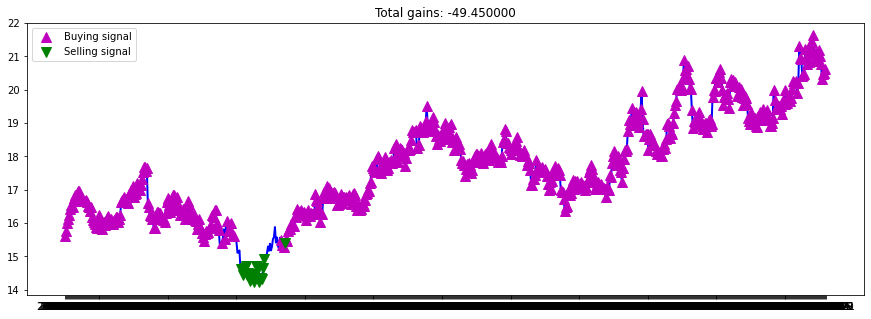

In [138]:
"""
Test
"""
#Initializating
testf = x_train
testc = pd.DataFrame(yo_train)
#
model_name = r"C:\Users\Administrator\model\modelT"
model1 = load_model(model_name)
#state = getState(x_train,0)
total_profit1 = 0
inventory1 = []
states_sell1 = []
states_buy1 = []

#backtesting
for t in range(len(testf)):
    #initializating
    state = getState(testf,t)
    action = np.argmax(model.predict(state))
    if action == 1:
        inventory1.append(testc.iloc[t,:])
        states_buy1.append(t)

    elif action == 2 and len(inventory1)>0:
        bought_price1 = inventory1.pop(0)
        total_profit1 += testc.iloc[t]-bought_price1
        states_sell1.append(t)

print("-------------------------------")
print('Total Profit: \n')
print(total_profit1)
print("-------------------------------")
plot_behavior(testc,states_buy1,states_sell1,total_profit1)